Calcoliamo lo Special Set Sp(f,h) per funzioni polinomiali dal toro piatto $[0,2\pi]\times[0,2\pi]/_\sim$  a  $\mathbb{R}^2$ della forma $(x,y) \mapsto (f_1(x,y),f_2(x,y))$ con $f_i$ somme finite di monomi della forma 

$r\ cos^{a_1}(a_2x+a_3)sen^{b_1}(b_2x+b_3)cos^{c_1}(c_2y+c_3)sen^{d_1}(d_2y+d_3)$ con $r,a_i,b_i,c_i,d_i\in\mathbb{Z},\ a_1,b_1,c_1,d_1\ge 0$.

Il nostro programma EPG prende in input: $f_1,f_2,p_1,p_2$, dove $p_1$ serve per creare sul toro una grglia di $p_1\times p_1$ punti sui quali lavoreremo e $p_2$ è la precisione per il calcolo dei punti Pareto critici.

Nel nostro esempio abbiamo considerato una traslazione orizzontale della Extended Pareto Grid (EPG) di $f$ in modo di farlo non interseccare quella di $h$ (a meno di intersezioni tra improper arcs).

In [1]:
from SpecialSet import *

h1 = parse("2cos^2(x) + 4cos(y)")
h2 = parse("sen^3(x) + 3sen^2(y)")
#h1ppc,h2ppc = EPG(h1,h2,50,0.01,0.7)
#print(len(h1ppc))
xh,hepg,himproper_arcs,htitle = EPG(h1,h2,100,0.3)
print(len([p for p,v in xh.items() if v]))

f1 = parse("cos(x)+cos(y)")
f2 = parse("sen(x)+sen(y)")
#f1ppc,f2ppc = EPG(f1,f2,50,0.01,0.2)
#print(len(f1ppc))
xf,fepg,fimproper_arcs,ftitle = EPG(f1,f2,100,0.1)
print(len([p for p,v in xf.items() if v]))

#Traslo l'epg di f
trasl = 5
fepg_trasl = fepg.copy() + fimproper_arcs.copy()
for p in fepg_trasl:
    p[0] = p[0]+trasl

somma_epg = fepg_trasl + hepg + himproper_arcs


899
769
341


Per calcolare lo Special Set abbiamo implementato la segunete funzione che si trova nel file SpecialSet.py, che prende come argomenti $C$,tolx,toly,$\epsilon$,somma_epg dove $C$ è una costante che maggiora $\vert \vert f \vert \vert_\infty, \vert \vert h \vert \vert_\infty$; tolx $\times$ toly è una griglia di punti sullo spazio di parametri $(0,1) \times [-C,C]$; $\epsilon$ è una tolleranza usata nel calcolo delle intersezioni con le rette che rappresenta lo spessore di queste rette e somma_epg è l'unione delle EPG, impromer contours comprese.

Questo esempio in particolare è stato a girar per 52 minuti e 28 secondi, quindi attenzione perché subito quando $\epsilon$ non è molto piccolo e la griglia comincia ad avere un po' di punti ci mette un bel po' di tempo.

250


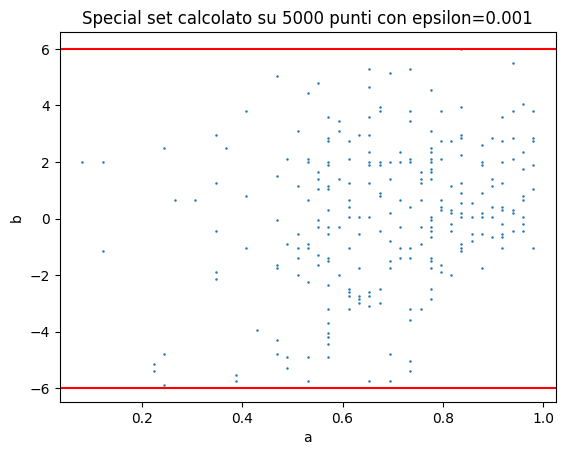

In [2]:
sp_f_h_image = special_set_image(6,50,100,0.001,somma_epg)
print(len(sp_f_h_image))